## Carga y prueba inicial


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255
)

train_dataset = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset/dataset_reducido',
                                            batch_size=100,
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 103 images belonging to 4 classes.


In [ ]:
print(train_dataset)

In [ ]:
train_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
train_dataset

In [ ]:
label_names = ['Closed look', 'Forward look', 'Left look', 'Right look']

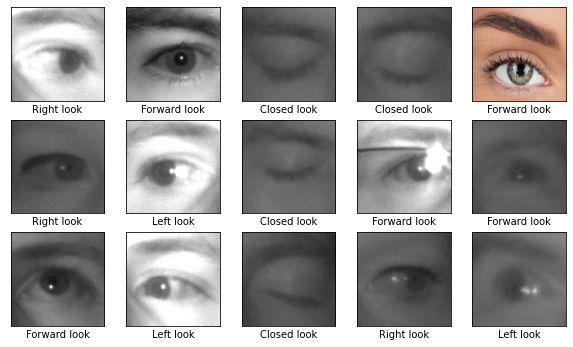

In [ ]:
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in train_dataset:
  for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(label_names[np.argmax(etiqueta[i])])
  break

## Split the dataset in train and test

In [ ]:
import os
import numpy as np
import shutil
import random
root_dir = "/content/drive/MyDrive/TFM/dataset/dataset_completo/" # for requesting directly pics
classes_dir = os.listdir(root_dir)

train_ratio = 0.8
val_ratio = 0.1

input_destination = "/content/drive/MyDrive/TFM/dataset/"

for cls in classes_dir:
    os.makedirs(input_destination +'train_dataset/' + cls, exist_ok=True)
    os.makedirs(input_destination +'val_dataset/' + cls, exist_ok=True)
    os.makedirs(input_destination +'test_dataset/' + cls, exist_ok=True)

    # for each class, let's counts its elements
    src = root_dir + cls
    allFileNames = os.listdir(src)

    # shuffle it and split into train/test
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(train_ratio * len(allFileNames)), int((1-val_ratio) * len(allFileNames))])

    # save their initial path
    train_FileNames = [src+'/'+ name  for name in train_FileNames.tolist()]
    val_FileNames = [src+'/'+ name  for name in val_FileNames.tolist()]
    test_FileNames  = [src+'/' + name for name in test_FileNames.tolist()]
    print("\n *****************************",
          "\n Total images: ",cls, len(allFileNames),
          '\n Training: ', len(train_FileNames),
          '\n Validation: ', len(val_FileNames),
          '\n Testing: ', len(test_FileNames),
          '\n *****************************')

    # copy files from the initial path to the final folders
    for name in train_FileNames:
      shutil.copy(name, input_destination +'train_dataset/' + cls)
    for name in val_FileNames:
      shutil.copy(name, input_destination +'val_dataset/' + cls)
    for name in test_FileNames:
      shutil.copy(name, input_destination +'test_dataset/' + cls)


# checking everything was fine
paths = ['train_dataset/','val_dataset/', 'test_dataset/']
for p in paths:
  for dir,subdir,files in os.walk(input_destination + p):
    print(dir,' ', p, str(len(files)))


 ***************************** 
 Total images:  left_look 3498 
 Training:  2798 
 Validation:  350 
 Testing:  350 
 *****************************

 ***************************** 
 Total images:  right_look 3601 
 Training:  2880 
 Validation:  360 
 Testing:  361 
 *****************************

 ***************************** 
 Total images:  close_look 3828 
 Training:  3062 
 Validation:  383 
 Testing:  383 
 *****************************

 ***************************** 
 Total images:  forward_look 3457 
 Training:  2765 
 Validation:  346 
 Testing:  346 
 *****************************
/content/drive/MyDrive/TFM/dataset/train_dataset/   train_dataset/ 0
/content/drive/MyDrive/TFM/dataset/train_dataset/left_look   train_dataset/ 2798
/content/drive/MyDrive/TFM/dataset/train_dataset/right_look   train_dataset/ 2880
/content/drive/MyDrive/TFM/dataset/train_dataset/close_look   train_dataset/ 3062
/content/drive/MyDrive/TFM/dataset/train_dataset/forward_look   train_dataset/ 2765
/

## Procesamiento y entrenamiento


4 classes:
['close_look', 'forward_look', 'left_look', 'right_look']


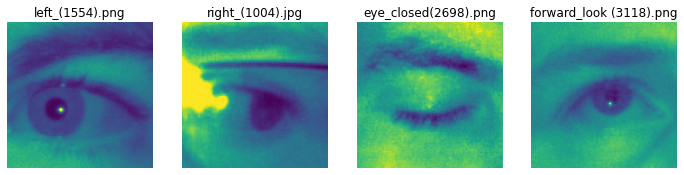

In [ ]:
from tensorflow.keras import models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = '/content/drive/MyDrive/TFM/dataset/train_dataset'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 20))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [ ]:
from keras.applications import VGG16

In [ ]:
vgg = VGG16()

553467096/553467096 [==============================] - 17s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import Sequential

In [ ]:
model_vgg = Sequential()

In [ ]:
for layer in vgg.layers[:-1]:
  model_vgg.add(layer)

In [ ]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model_vgg.layers:
  layer.trainable=False

In [ ]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
model_vgg.add(Dropout(0.3))

In [ ]:
model_vgg.add(Dense(4, activation='softmax'))

In [ ]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model_vgg.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

data_folder_train = "/content/drive/MyDrive/TFM/dataset/train_dataset/"
data_folder_val = "/content/drive/MyDrive/TFM/dataset/val_dataset/"

print("Getting Data...")
datagen_train = ImageDataGenerator(rescale=1./255, # normalize pixel values
                              rotation_range=20,
                              zoom_range=0.1,
                              width_shift_range=0.15,
                              height_shift_range=0.15,
                              horizontal_flip=False,
                              vertical_flip=False)

print("Preparing training dataset...")
train_generator = datagen_train.flow_from_directory(
    data_folder_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

datagen_val = ImageDataGenerator(rescale=1./255, # normalize pixel values
                               )

print("Preparing validation dataset...")
validation_generator = datagen_val.flow_from_directory(
    data_folder_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 13821 images belonging to 4 classes.
Preparing validation dataset...
Found 1439 images belonging to 4 classes.
Data generators ready


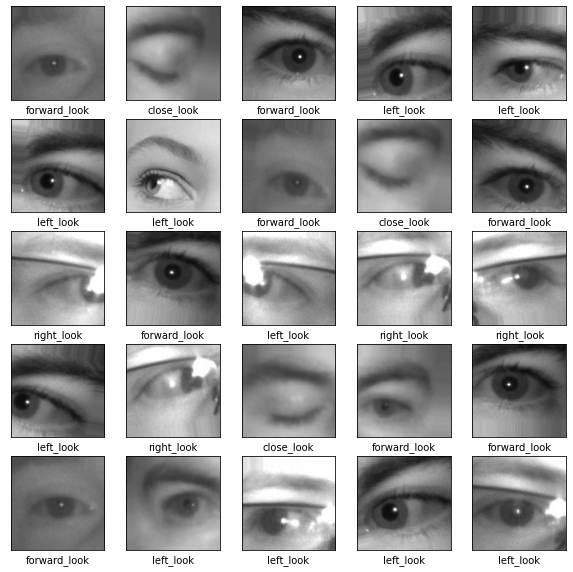

In [ ]:
classes = os.listdir(data_folder)
classes.sort()
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in validation_generator:
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(classes[np.argmax(etiqueta[i])]) 
  break

In [ ]:
# Train the model over 25 epochs using 32-image batches and using the validation holdout dataset for validation
num_epochs = 25
history = model_vgg.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/25
431/431 [==============================] - 205s 453ms/step - loss: 1.4075 - accuracy: 0.3548 - val_loss: 1.2126 - val_accuracy: 0.4751
Epoch 2/25
431/431 [==============================] - 195s 451ms/step - loss: 1.2574 - accuracy: 0.4245 - val_loss: 1.2805 - val_accuracy: 0.4631
Epoch 3/25
431/431 [==============================] - 192s 445ms/step - loss: 1.2070 - accuracy: 0.4628 - val_loss: 1.1733 - val_accuracy: 0.4787
Epoch 4/25
431/431 [==============================] - 191s 443ms/step - loss: 1.1698 - accuracy: 0.4773 - val_loss: 1.1225 - val_accuracy: 0.5384
Epoch 5/25
431/431 [==============================] - 194s 450ms/step - loss: 1.1369 - accuracy: 0.4937 - val_loss: 1.1220 - val_accuracy: 0.5057
Epoch 6/25
431/431 [==============================] - 195s 452ms/step - loss: 1.1167 - accuracy: 0.5075 - val_loss: 1.0410 - val_accuracy: 0.5206
Epoch 7/25
431/431 [==============================] - 193s 447ms/step - loss: 1.1051 - accuracy: 0.5120 - val_loss: 1.0537 -

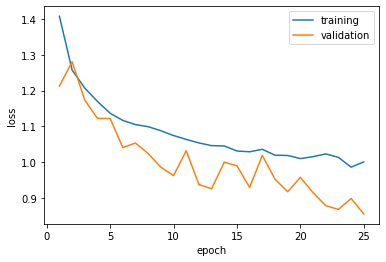

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

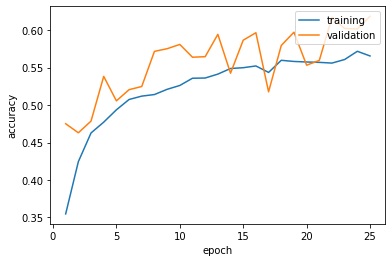

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 0s 171ms/step


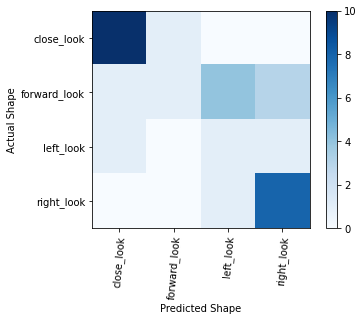

In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model_vgg.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import csv
hist_df = pd.DataFrame(history.history)

hist_csv_file = '/content/drive/MyDrive/TFM/history_vgg16.csv'
# with open(hist_csv_file, mode='w') as f:
#    hist_df.to_csv(f)

In [ ]:
export_dir = 'drive/MyDrive/ModelosGuardados/model_vgg'
tf.keras.models.save_model(model_vgg, filepath=export_dir)
model_vgg.save("drive/MyDrive/ModelosGuardados/model_vgg.h5")

In [ ]:
hist_df = pd.read_csv('/content/drive/MyDrive/TFM/history_vgg16.csv')

In [ ]:
# Código para cargar una red entrenada desde nuestro equipo al sevidor de Google Colab
from google.colab import files
model_vgg = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_vgg')
model_vgg

In [ ]:
num_epochs = 25
hist_csv_file = '/content/drive/MyDrive/TFM/history_vgg16.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.6186
min_val_loss =  0.8559
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file)
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_vgg.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_vgg'
    tf.keras.models.save_model(model_vgg, filepath=export_dir)
    model_vgg.save("drive/MyDrive/ModelosGuardados/model_vgg.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  26 : 	
432/432 [==============================] - 185s 427ms/step - loss: 0.9761 - accuracy: 0.5757 - val_loss: 0.8870 - val_accuracy: 0.6157
Epoca  27 : 	
432/432 [==============================] - 183s 424ms/step - loss: 0.9803 - accuracy: 0.5702 - val_loss: 0.8786 - val_accuracy: 0.5962
Epoca  28 : 	
432/432 [==============================] - 184s 424ms/step - loss: 0.9786 - accuracy: 0.5815 - val_loss: 0.8662 - val_accuracy: 0.6060
Epoca  29 : 	
432/432 [==============================] - 184s 425ms/step - loss: 0.9848 - accuracy: 0.5721 - val_loss: 1.0322 - val_accuracy: 0.5601
Epoca  30 : 	
432/432 [==============================] - 183s 423ms/step - loss: 0.9934 - accuracy: 0.5733 - val_loss: 0.9059 - val_accuracy: 0.6220


Nuevo máximo accuracy:  0.6219596862792969 
 Nuevo mínimo loss:  0.9058713912963867
Epoca  31 : 	
432/432 [==============================] - 190s 440ms/step - loss: 0.9677 - accuracy: 0.5807 - val_loss: 0.8485 - val_accuracy: 0.6164
Epoca  32 : 	
432/432 [==============================] - 186s 431ms/step - loss: 0.9713 - accuracy: 0.5809 - val_loss: 0.9835 - val_accuracy: 0.6199
Epoca  33 : 	
432/432 [==============================] - 183s 423ms/step - loss: 0.9689 - accuracy: 0.5806 - val_loss: 0.9694 - val_accuracy: 0.5525
Epoca  34 : 	
432/432 [==============================] - 183s 424ms/step - loss: 0.9761 - accuracy: 0.5746 - val_loss: 0.9416 - val_accuracy: 0.5837
Epoca  35 : 	
432/432 [==============================] - 182s 422ms/step - loss: 0.9803 - accuracy: 0.5732 - val_loss: 0.9740 - val_accuracy: 0.5726
Epoca  36 : 	
432/432 [==============================] - 184s 425ms/step - loss: 0.9932 - accuracy: 0.5733 - val_loss: 0.8562 - val_accuracy: 0.5900
Epoca  37 : 	
432/432 

Nuevo máximo accuracy:  0.6275191307067871 
 Nuevo mínimo loss:  0.8297434449195862
Epoca  38 : 	
432/432 [==============================] - 185s 427ms/step - loss: 0.9607 - accuracy: 0.5850 - val_loss: 0.8782 - val_accuracy: 0.5983
Epoca  39 : 	
432/432 [==============================] - 186s 429ms/step - loss: 0.9517 - accuracy: 0.5929 - val_loss: 0.8434 - val_accuracy: 0.6310


Nuevo máximo accuracy:  0.6309937238693237 
 Nuevo mínimo loss:  0.8434014916419983
Epoca  40 : 	
432/432 [==============================] - 186s 429ms/step - loss: 0.9576 - accuracy: 0.5858 - val_loss: 0.8497 - val_accuracy: 0.6407


Nuevo máximo accuracy:  0.6407227516174316 
 Nuevo mínimo loss:  0.8496805429458618
Epoca  41 : 	
432/432 [==============================] - 185s 428ms/step - loss: 0.9578 - accuracy: 0.5832 - val_loss: 0.8896 - val_accuracy: 0.5886
Epoca  42 : 	
432/432 [==============================] - 183s 424ms/step - loss: 0.9887 - accuracy: 0.5757 - val_loss: 0.9448 - val_accuracy: 0.5921
Epoca  43 : 	
432/432 [==============================] - 183s 424ms/step - loss: 0.9586 - accuracy: 0.5858 - val_loss: 0.8994 - val_accuracy: 0.6386
Epoca  44 : 	
432/432 [==============================] - 182s 421ms/step - loss: 0.9550 - accuracy: 0.5865 - val_loss: 0.8259 - val_accuracy: 0.6206
Epoca  45 : 	
432/432 [==============================] - 184s 425ms/step - loss: 0.9492 - accuracy: 0.5886 - val_loss: 0.8127 - val_accuracy: 0.6345
Epoca  46 : 	
432/432 [==============================] - 185s 427ms/step - loss: 0.9426 - accuracy: 0.5903 - val_loss: 0.8324 - val_accuracy: 0.5997
Epoca  47 : 	
432/432 

In [ ]:
hist_csv_file = '/content/drive/MyDrive/TFM/history_vgg16.csv'
hist_df = pd.read_csv(hist_csv_file)

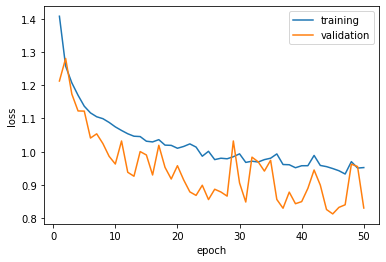

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_loss = hist_df["loss"]
validation_loss = hist_df["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

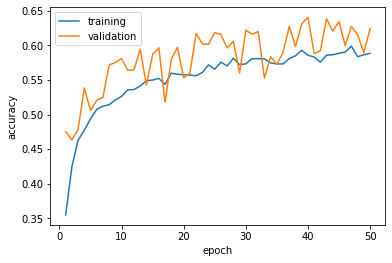

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_accuracy = hist_df["accuracy"]
validation_accuracy = hist_df["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 18s 18s/step


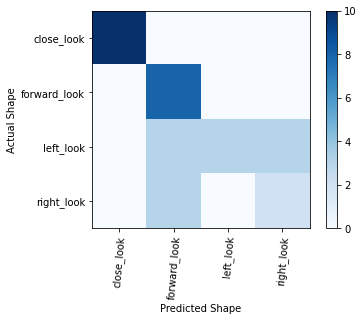

In [ ]:
model_vgg = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_vgg')

# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model_vgg.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

## Inferencia

In [8]:
# Código para cargar una red entrenada desde nuestro equipo al sevidor de Google Colab
from google.colab import files
model = tf.keras.models.load_model('/content/drive/MyDrive/ModelosGuardados/model_vgg.h5')
model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255) 

In [10]:
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset/test_dataset',
                                            batch_size=1440,
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 1440 images belonging to 4 classes.


In [11]:
import os
data_folder = '/content/drive/MyDrive/TFM/dataset/test_dataset'
classes = os.listdir(data_folder)
classes.sort()

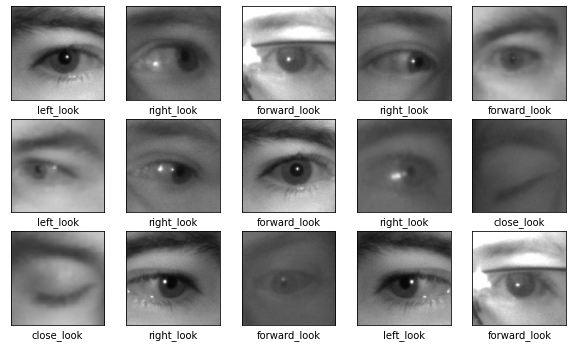

In [12]:
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in test_generator:
  for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(classes[np.argmax(etiqueta[i])])
  break

Generating predictions from validation data...
45/45 [==============================] - 15s 149ms/step


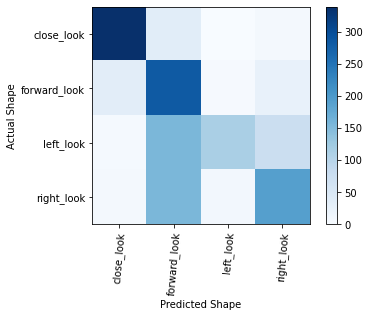

Average time of prediction:  0.011083120769924588


In [19]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = test_generator[0][0]
y_test = test_generator[0][1]

# Use the model to predict the class
start = time.time()
class_probabilities = model.predict(x_test)
end = time.time()

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show() 
print("Average time of prediction: ", (end-start) / len(predictions))

In [46]:
print("Average time of prediction: %6.4f" % (1000*(end-start) / (len(predictions))), "ms")

Average time of prediction: 11.0831 ms


In [18]:
start = time.time()
time.sleep(1)
end = time.time()
print(end-start)

1.0008940696716309


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy = accuracy_score(true_labels,predictions)
sensitivity = recall_score(true_labels,predictions, average = 'macro')
specificity = precision_score(true_labels,predictions, average = 'weighted')
print("Accuracy: ", accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Accuracy:  0.6458333333333334
Sensitivity:  0.6415885315693992
Specificity:  0.7257651095647756


Confusion matrix, without normalization
[[339  37   0   7]
 [ 35 284   3  24]
 [  4 155 115  76]
 [  6 155   8 192]]


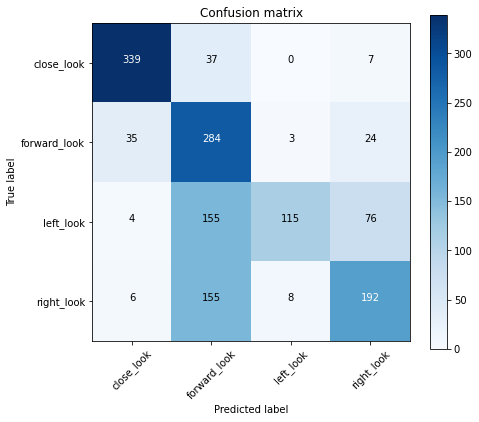

In [23]:
cnf_matrix = confusion_matrix(true_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes)

In [76]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
res = []
for l in range(len(classes)):

    prec,recall, f_score, support = precision_recall_fscore_support(np.array(true_labels)==l,
                                                      np.array(predictions)==l,
                                                      pos_label=True,average=None,
                                                      digits=4)
    res.append([classes[l],recall[0],recall[1], prec[1], support[1]])

In [79]:
pd.DataFrame(res,columns = ['class','specificity','sensitivity', 'precision', 'support'])

,class,specificity,sensitivity,precision,support
0,close_look,0.957427,0.885117,0.882812,383
1,forward_look,0.682815,0.820809,0.450079,346
2,left_look,0.989908,0.328571,0.912698,350
3,right_look,0.900834,0.531856,0.642140,361


In [80]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}

# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm)

In [82]:
per_class_accuracies

{'close_look': 0.9381944444444444,
 'forward_look': 0.7159722222222222,
 'left_look': 0.8291666666666667,
 'right_look': 0.8083333333333333}

In [73]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predictions, target_names=classes, digits=5))

# recall = sensitivity = tp / (tp + fn)
# precision = tp / (tp + fp)
# specificity = tn / (tn + fp)

              precision    recall  f1-score   support

  close_look    0.88281   0.88512   0.88396       383
forward_look    0.45008   0.82081   0.58137       346
   left_look    0.91270   0.32857   0.48319       350
  right_look    0.64214   0.53186   0.58182       361

    accuracy                        0.64583      1440
   macro avg    0.72193   0.64159   0.63259      1440
weighted avg    0.72577   0.64583   0.63810      1440



In [31]:
# make a prediction for a new image.
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    plt.imshow(img)
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32') / 255

    return img
 
# load an image and predict the class
def run_example(image_name):
    # load the image
    img = load_image("/content/drive/MyDrive/TFM/inferencia/" + image_name)
    # load model
    #model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_vgg')
    # predict the class
    result = model.predict(img)
    print(result[0])
    etiqueta_prediccion = np.argmax(result)
    plt.xlabel(classes[etiqueta_prediccion])
    print(etiqueta_prediccion)
    print(classes[etiqueta_prediccion])

1/1 [==============================] - 0s 32ms/step
[6.6092252e-05 5.2011102e-01 7.0684046e-02 4.0913883e-01]
1
forward_look
1/1 [==============================] - 0s 32ms/step
[2.1222111e-05 5.8242470e-01 1.0463194e-01 3.1292209e-01]
1
forward_look
1/1 [==============================] - 0s 22ms/step
[1.6673301e-04 3.1878161e-01 2.1356197e-01 4.6748975e-01]
3
right_look
1/1 [==============================] - 0s 18ms/step
[0.00133184 0.198606   0.12094524 0.67911696]
3
right_look


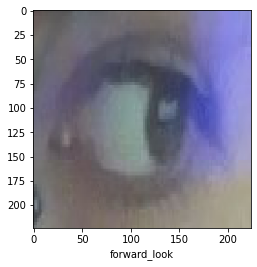

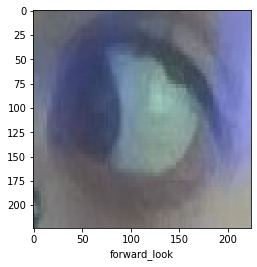

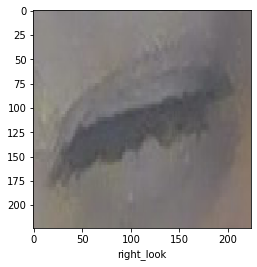

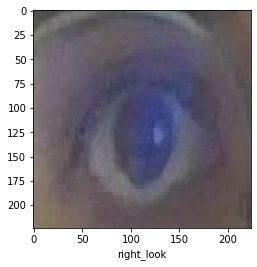

In [ ]:
# entry point, run the example
image_names = ["yo_right.jpg", "yo_left.jpg", "yo_close.jpg", "yo_forward.jpg"]
for image in image_names:
  plt.figure()
  run_example(image)

In [ ]:
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset_webcam',
                                            batch_size=48,
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 48 images belonging to 4 classes.


Generating predictions from test data...
2/2 [==============================] - 0s 189ms/step
Confusion matrix, without normalization
[[2 9 0 1]
 [0 7 0 5]
 [1 8 0 3]
 [1 6 0 5]]
Accuracy:  0.2916666666666667
Average time of prediction: 9.4745 ms


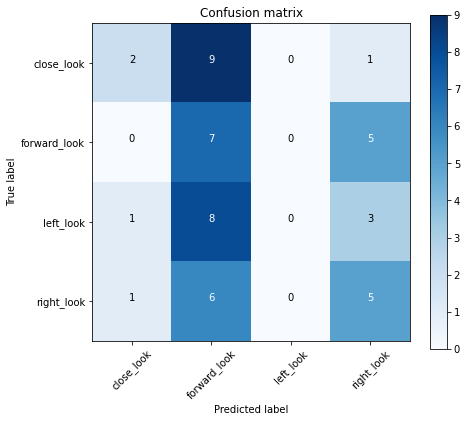

In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_vgg')
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

print("Generating predictions from test data...")
# Get the image and label arrays for the first batch of validation data
x_test = test_generator[0][0]
y_test = test_generator[0][1]

# Use the model to predict the class
start = time.time()
class_probabilities = model.predict(x_test)
end = time.time()

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

cnf_matrix = confusion_matrix(true_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels,predictions)
print("Accuracy: ", accuracy)

print("Average time of prediction: %6.4f" % (1000*(end-start) / (len(predictions))), "ms")